# Exercise #1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

A, B, C:

Import dataset store it as dataframe in python: filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

    Add column headers to dataset
    Read the first 5 lines and display


In [2]:
# A, B, C
header = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
"peak-rpm","city-mpg","highway-mpg","price"]
data = pd.read_csv("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv", 
                   names=header)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


D: Are there missing data? Or illegal characters in the dataframe?

In [3]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

E: Replace the character “?” with nan

In [4]:
object_cols = data.select_dtypes('object').columns
for obj in object_cols:
    data[obj] = data[obj].replace("?", np.nan)

F: Count missing values in each column and print it with column name

    i.	"normalized-losses": 41 missing data
    ii.	"num-of-doors": 2 missing data
    iii.	"bore": 4 missing data
    iv.	"stroke" : 4 missing data
    v.	"horsepower": 2 missing data
    vi.	"peak-rpm": 2 missing data
    vii.	"price": 4 missing data (Response)


In [5]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
data.shape

(205, 26)

G: Delete price rows that have missing data

In [7]:
# G
data = data.dropna(subset=['price'])
data.shape

(201, 26)

H: Normalized losses,bore,stroke,horsepower,peak-rpm, - replace missing with mean of the column

In [8]:
# H
int_cols_toimpute = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']
data[int_cols_toimpute] = data[int_cols_toimpute].astype('float64')
data[int_cols_toimpute] = data[int_cols_toimpute].fillna(data[int_cols_toimpute].mean())
data[int_cols_toimpute].isnull().sum()

normalized-losses    0
bore                 0
stroke               0
horsepower           0
peak-rpm             0
dtype: int64

I: Num-of-doors replace missing with most frequent value in the column

In [9]:
data['num-of-doors'].fillna(data['num-of-doors'].mode()[0], inplace=True)
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

J: Reset the index of dataframe

In [10]:
data = data.reset_index(drop=True)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


K: Check datatype of columns and convert numeric/quantitative variables to float or int

In [11]:
data.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [12]:
data['price'] = data['price'].astype('int64')

In [13]:
data['num-of-cylinders'].value_counts()

four      157
six        24
five       10
two         4
eight       4
twelve      1
three       1
Name: num-of-cylinders, dtype: int64

In [14]:
def get_num_of_cylinders(cylinders):
    switcher = {
        'four': 4,
        'six': 6,
        'five': 5,
        'two': 2,
        'eight': 8,
        'three': 3,
        'twelve': 12
    }
    return (switcher.get(cylinders, 0))

data['num-of-cylinders'] = data['num-of-cylinders'].apply(lambda x: get_num_of_cylinders(x)).astype('int')
data['num-of-cylinders'].value_counts()

4     157
6      24
5      10
8       4
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64

L: Transform city-mpg and highway-mpg into liters/100km using conversion formula:
L/100km = 235/mpg i.e. create two new column “city-L/100km” and “highway-L/100km”

In [15]:
data['city-L/100km'] = 235 / data['city-mpg']
data['highway-L/100km'] = 235 / data['highway-mpg']
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495,11.190476,8.703704
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500,11.190476,8.703704
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500,12.368421,9.038462
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950,9.791667,7.833333
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450,13.055556,10.681818


M: Normalize columns length, width, height so that their values range from 0 to 1.
Hint:  Replace original values with original_value/max_value

In [16]:
lwh_cols = ['length', 'width', 'height']
data[lwh_cols] = data[lwh_cols]/data[lwh_cols].max()
data[lwh_cols].describe()

,length,width,height
count,201.000000,201.000000,201.000000
mean,0.837102,0.915126,0.899108
std,0.059213,0.029187,0.040933
min,0.678039,0.837500,0.799331
25%,0.801538,0.890278,0.869565
50%,0.832292,0.909722,0.904682
75%,0.881788,0.925000,0.928094
max,1.000000,1.000000,1.000000


N: Plot the histogram of horsepower to see its distribution

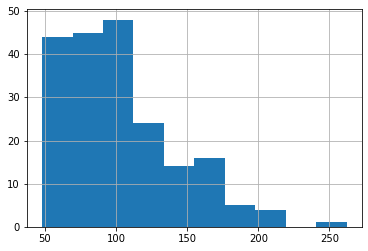

In [17]:
data['horsepower'].hist()

In [18]:
data['horsepower'].describe()

count    201.000000
mean     103.396985
std       37.365602
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

O: Create three equal sized bins “low”, “medium”, “high” and organize values in column horsepower into new column “horsepower-binned”

In [19]:
labels = ['Low','Medium','High']
data['horsepower-binned'] = pd.qcut(data['horsepower'], q=3, labels=labels)
data['horsepower-binned'].value_counts()

Low       68
Medium    67
High      66
Name: horsepower-binned, dtype: int64

P: Plot distribution of “horsepower-binned”

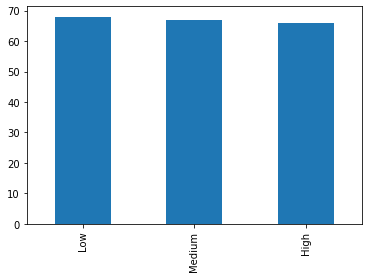

In [20]:
data['horsepower-binned'].value_counts().plot(kind='bar')

Q: Convert “fuel-type” into one-hot-encoded variables. Repeat same for “aspiration” and then drop columns “fuel-type” and “aspiration”

In [21]:
ohe_cols = ['fuel-type', 'aspiration']
data = pd.concat([data.drop(ohe_cols, axis=1), pd.get_dummies(data[ohe_cols])], axis=1)
data.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495,11.190476,8.703704,Medium,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500,11.190476,8.703704,Medium,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500,12.368421,9.038462,High,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950,9.791667,7.833333,Medium,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450,13.055556,10.681818,High,0,1,1,0
